In [323]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [324]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [325]:
import safe as sf
import datamol as dm
from safe.trainer.data_utils import get_dataset
from safe import SAFEDesign

In [326]:
designer = SAFEDesign.load_default(verbose=True)
candidate_mol = "O=C(C#CCN1CCCCC1)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1"

scaffold = "[*]N-c1ccc2ncnc(-N[*])c2c1" # this is for scaffold decoration
superstructure = "c1ccc2ncncc2c1"
side_chains = '[1*]C(=O)C#CCN1CCCCC1.[2*]c1cccc(Br)c1' # this is for scaffold morphing
motif = "[*]-N1CCCCC1" # this is for motif extension
linker_generation = "[*]-N1CCCCC1.Brc1cccc(Nc2ncnc3ccc(-[*])cc23)c1" # this is for linker generation


We start with the image shown in the README of the SAFE GitHub Repository to assess the performance on the various tasks SAFE should in theory be good at. 

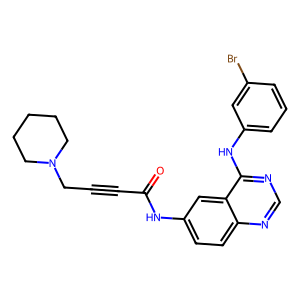

In [327]:
dm.to_image(dm.to_mol(candidate_mol))

## Scaffold Morphing

In scaffold morphing, we wish to replace a scaffold by another one in a molecule. The process requires as input that the user provides either the side chains or the input molecules and the core

In [328]:
encoded_side_chains = "c14cccc(Br)c1.O=C8C#CC5.N15CCCCC1"
#encoded_side_chains = 'c14cccc(Br)c1.C8(=O)C#CC3.N13CCCCC1'
encoded_side_chains = sf.encode(side_chains)



In [329]:
# generated = designer._completion(fragment=encoded_side_chains, is_safe=True,  n_samples_per_trial=5, n_trials=2, sanitize=False, do_not_fragment_further=True)
# generated = [x for x in generated if x is not None]

In [330]:
side_chains2 = "Brc1ccc(-*)cc1.[O-]C(=O)c1ccc(-*)cc1"

In [331]:
prefix = '[*:5]-N1CCCCC1.Brc1cccc(Nc2ncnc3ccc(-[*:6])cc23)c1'

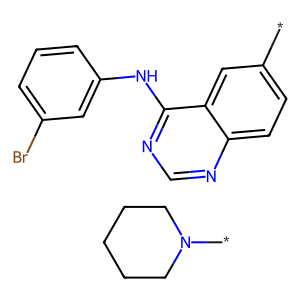

In [332]:
dm.to_image(linker_generation)

In [411]:
generated = designer.scaffold_morphing(side_chains=prefix, n_samples_per_trial=5, n_trials=1, sanitize=False, do_not_fragment_further=False,)

['8']
[[27, 14, 27, 27, 27, 37, 22, 27, 14]]
['c17cccc(Br)c1.c1cc8cc2c%10ncnc12.N%107C1CCCN9C1.c18cccc(Br)c1.C96.c16ccc2c(c1)OCO2', 'c17cccc(Br)c1.c1cc8cc2c%10ncnc12.N%107C1CCCN9C1.c18cccc(Br)c1.C96.c16ccc2ccccc2c1', 'c17cccc(Br)c1.c1cc8cc2c%10ncnc12.N%107C1CCCN9C1.c18cccc(Br)c1.C96.c16cccc2ccccc12', 'c17cccc(Br)c1.c1cc8cc2c%10ncnc12.N%107C1CCCN9C1.C18CC1.C96.c16ccc2c(c1)OCO2', 'c17cccc(Br)c1.c1cc8cc2c%10ncnc12.N%107C1CCCN9C1.c18cccc(Br)c1.C96.c16ccc2c(c1)OCCO2']


In [412]:
generated

['Brc1cccc(-c2ccc3ncnc(N(c4cccc(Br)c4)C4CCCN(Cc5ccc6c(c5)OCO6)C4)c3c2)c1',
 'Brc1cccc(-c2ccc3ncnc(N(c4cccc(Br)c4)C4CCCN(Cc5ccc6ccccc6c5)C4)c3c2)c1',
 'Brc1cccc(-c2ccc3ncnc(N(c4cccc(Br)c4)C4CCCN(Cc5cccc6ccccc56)C4)c3c2)c1',
 'Brc1cccc(N(c2ncnc3ccc(C4CC4)cc23)C2CCCN(Cc3ccc4c(c3)OCO4)C2)c1',
 'Brc1cccc(-c2ccc3ncnc(N(c4cccc(Br)c4)C4CCCN(Cc5ccc6c(c5)OCCO6)C4)c3c2)c1']

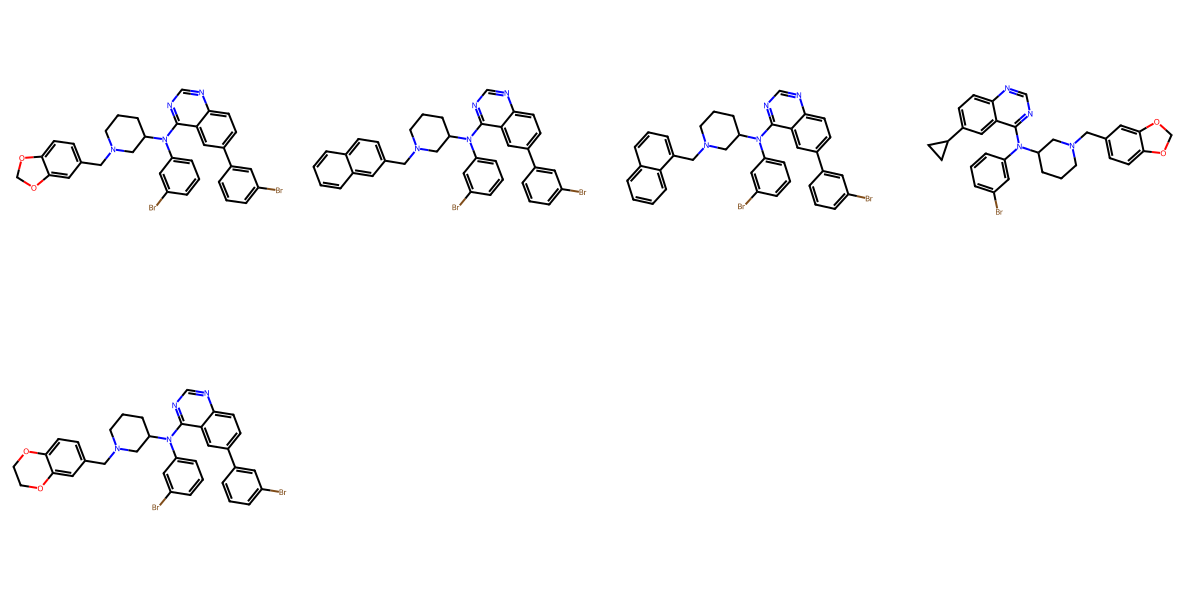

In [413]:
dm.to_image(generated)

In [176]:
dm.viz.match_substructure([dm.to_mol(x) for x in generated], dm.from_smarts(side_chains))

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 dm.viz.match_substructure([dm.to_mol(x) for x in generated], dm.from_smarts(side_chains)     │
│   2                                                                                              │
│                                                                                                  │
│ in <listcomp>:1                                                                                  │
│                                                                                                  │
│ ❱ 1 dm.viz.match_substructure([dm.to_mol(x) for x in generated], dm.from_smarts(side_chains)     │
│   2                                                                                              │
│                                                                                                  │
│ /home/emmanuel/.conda/envs/safe/lib/python3.11/site-packages/datamol/mol.py:96 in to_mol         │
│                                                                                                  │
│     93 │   """                                                                                   │
│     94 │                                                                                         │
│     95 │   if not isinstance(mol, (str, Mol)):                                                   │
│ ❱   96 │   │   raise ValueError(f"Input should be a Mol or a string instead of '{type(mol)}'")   │
│     97 │                                                                                         │
│     98 │   if isinstance(mol, str):                                                              │
│     99 │   │   smiles_params = rdmolfiles.SmilesParserParams()                                   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: Input should be a Mol or a string instead of '<class 'NoneType'>'

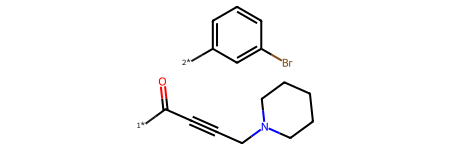

In [63]:
dm.to_mol(side_chains)